# 银行营销数据集
- 数据集: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing
- 目标: `预测客户是否会认购定期存款`
- 适合的算法: 逻辑回归、KNN、SVM、决策树、随机森林、朴素贝叶斯、深度学习（ANN）
- 该数据与葡萄牙银行机构`基于电话联系`的直接营销活动有关。通常需要`与同一客户进行多个联系`，以便得知是否订阅产品（银行定期存款）（`Yes`或`No`）
> 整理者: 杨冠林

**该表所有数据字段**:
- 输入变量(构建预测模型所需的`X`):
> 数据类型: `numeric`:数字类型数据 `categorical`:分类类型数据 `binary`:二进制

  - 银行`客户`数据:

|字段|解释(字段类)|内含数据(英)|内含数据(中)|
|---|---|---|---|
|`age`|年龄(numeric)|||
|`job`|工作类型(categorical)|admin<br>blue-collar<br>entrepreneur<br>housemaid<br>management<br>retired<br>self-employed<br>services<br>student<br>technician<br>unemployed<br>unknown|管理员<br>蓝领<br>企业家<br>女佣<br>管理<br>退休<br>自雇<br>服务<br>学生<br>技术员<br>失业<br>未知|
|`marital`|婚姻状况(categorical)|divorced<br>married<br>single<br>unknown<br>(note: "divorced" means divorced or widowed)|离婚<br>已婚<br>单身<br>未知”<br>(注：“离婚”包括离婚或丧偶)|
|`education`|教育情况(categorical)|basic.4y<br>basic.6y<br>basic.9y<br>high.school<br>illiterate<br>professional.course<br>university.degree<br>unknown|基本.4年<br>基本.6年<br>基本.9年<br>高中<br>文盲<br>专业课程(课外专业补习班)<br>大学学位<br>未知|
|`default`|有无信用违约? (categorical)|no<br>yes<br>unknown|否<br>是<br>未知|
|`housing`|有无住房贷款? (categorical)|no<br>yes<br>unknown|否<br>是<br>未知|
|`loan`|有无个人贷款? (categorical)|no<br>yes<br>unknown|否<br>是<br>未知|

  - 与`最近一次联系`相关的属性:

|字段|解释(字段类)|内含数据(英)|内含数据(中)|
|---|---|---|---|
|`contact`|通信类型(categorical)|cellular<br>telephone|"蜂窝"(移动电话)<br>"电话"(指固定电话)|
|`month`|一年中的月份 (categorical)|jan,feb,mar,...,nov,dec|1~12月的简写|
|`day_of_week`|周几 (categorical)|mon,tue,wed,thu,fri|工作日简写|
|`duration`|联系持续时间以秒计 (numeric)|||
> `重要提示`: `duration`对输出`y`有很大影响(比如时间为`0`则`y`一定为`no`,但在做分类预测模型时持续时间是未知的)<br>因此: `做模型预测时不应包含此字段,如果做统计则可以使用此字段作为一种参照`|

  - 其他属性:

|字段|解释|字段类|
|---|---|---|
|`campaign`|活动,指营销期间对该客户的总通话次数<br>(包括最近一次联系)|numeric|
|`pdays`|对于该客户,距离上次campaign营销活动过去的天数<br>(999 表示客户此前没有被营销过)|numeric|
|`previous`|对于该客户,上次campaign营销活动的联系次数|numeric|
|`poutcome`|上次campaign营销活动的结果<br>`failure 失败`<br>`nonexistent 不存在`<br>`success 成功`|categorical|

  - 社会和经济背景有关的属性

|字段|字段类|解释(英)|解释(中)
|---|---|---|---|
|`emp.var.rate`|numeric|employment variation rate - quarterly indicator|指就业变化率,季度指标 | 
|`cons.price.idx`|numeric|consumer price index - monthly indicator|指消费者物价指数,月度指标|
|`cons.conf.idx`|numeric|consumer confidence index - monthly indicator|指消费者信心指数,月度指标|  
|`euribor3m`|numeric|euribor 3 month rate - daily indicator |欧洲银行三个月利率,每日指标|
|`nr.employed`|numeric|number of employees - quarterly indicator |指就业人数,季度指标|

- 输出变量 (期望目标`y`):

|名|解释|字段类|值(英)|值(中)|
|---|---|---|---|---|
|y|has the client subscribed a term deposit?|binary|yes<br>no|是<br>否|

- 缺失的属性值
> 某些分类属性中有几个缺失值，所有值都使用“unknown”标签进行编码<br>可以将这些缺失值视为可能的类标签，也可以使用删除或插补技术。

----
## 问题分析
- 主目标为`预测客户是否会订阅定期存款`,分析属性,选取特征,过程使用`markdown`单元
> VSCode扩展推荐:`hediet.vscode-drawio`,`mushan.vscode-paste-image`
1. `draw.io`的使用: 新建 `XXX.dio`扩展名文档,可画流程图,`E-R`图等
2. `PasteImage`的使用:

![](pics/2022-12-29-11-05-55.png)

   - 通过任意方式截图
   - 使用`Ctrl+Alt+V`,即可将剪贴板中的见截图保存到  `项目主文件夹/pics` 路径


----
## 数据准备
- 数据的导入,检视,清洗,操纵,预处理等等,自行处理
> 要求:处理前的数据在`original`文件夹,处理后的(或者生成的新文件)文件另存至`post_cleaning`文件夹,保持`项目文件树`整洁美观

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyecharts.charts import Pie,Scatter,Line,Bar,Boxplot,HeatMap
import pyecharts.options as opts

In [3]:
df = pd.read_csv('./original/bank-additional-full.csv',sep=';')
# comma seperrated 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [5]:
df.loc[df['duration'] == 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


In [6]:
df.drop(df.loc[df['duration'] == 0].index,axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41184 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41184 non-null  int64  
 1   job             41184 non-null  object 
 2   marital         41184 non-null  object 
 3   education       41184 non-null  object 
 4   default         41184 non-null  object 
 5   housing         41184 non-null  object 
 6   loan            41184 non-null  object 
 7   contact         41184 non-null  object 
 8   month           41184 non-null  object 
 9   day_of_week     41184 non-null  object 
 10  duration        41184 non-null  int64  
 11  campaign        41184 non-null  int64  
 12  pdays           41184 non-null  int64  
 13  previous        41184 non-null  int64  
 14  poutcome        41184 non-null  object 
 15  emp.var.rate    41184 non-null  float64
 16  cons.price.idx  41184 non-null  float64
 17  cons.conf.idx   41184 non-null 

In [7]:
kehu_guanxi = df.iloc[:,0:7]
lianxi_guanxi = df.iloc[:,7:11]
other_guanxi = df.iloc[:,11:15]
shehui_guanxi = df.iloc[:,15:20]
target = df['y']
kehu_guanxi

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


<AxesSubplot: xlabel='age'>

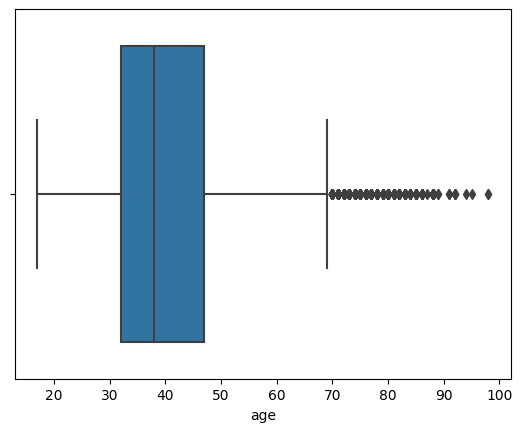

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
kehu_guanxi['job'] = le.fit_transform(kehu_guanxi['job'])
kehu_guanxi['marital'] = le.fit_transform(kehu_guanxi['marital'])
kehu_guanxi['education'] = le.fit_transform(kehu_guanxi['education'])
kehu_guanxi['default'] = le.fit_transform(kehu_guanxi['default'])
kehu_guanxi['housing'] = le.fit_transform(kehu_guanxi['housing'])
kehu_guanxi['loan'] = le.fit_transform(kehu_guanxi['loan'])
sns.boxplot(data=kehu_guanxi,x='age')

In [9]:
kehu_guanxi.loc[kehu_guanxi['age'] <= 32, 'age'] = 1
kehu_guanxi.loc[(kehu_guanxi['age'] > 32) & (kehu_guanxi['age'] <= 47), 'age'] = 2
kehu_guanxi.loc[(kehu_guanxi['age'] > 47) & (kehu_guanxi['age'] <= 70), 'age'] = 3
kehu_guanxi.loc[(kehu_guanxi['age'] > 70) & (kehu_guanxi['age'] <= 98), 'age'] = 4
kehu_guanxi

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0
41184,2,1,1,5,0,0,0
41185,3,5,1,6,0,2,0
41186,2,9,1,5,0,0,0


In [10]:
lianxi_guanxi['contact'] = le.fit_transform(lianxi_guanxi['contact'])
lianxi_guanxi['month'] = le.fit_transform(lianxi_guanxi['month'])
lianxi_guanxi['day_of_week'] = le.fit_transform(lianxi_guanxi['day_of_week'])


In [11]:
lianxi_guanxi['duration'] = lianxi_guanxi['duration'].apply(lambda x : round((x/60),2))

In [12]:
# lianxi_guanxi['duration'].describe()
# sns.boxplot(lianxi_guanxi,x='duration')
a = Boxplot()
a.add_xaxis(['duration'])
a.add_yaxis('',a.prepare_data([lianxi_guanxi['duration'].values.tolist()]))
a.render_notebook()

In [13]:
lianxi_guanxi['duration'].describe()

count    41184.000000
mean         4.305192
std          4.321322
min          0.020000
25%          1.700000
50%          3.000000
75%          5.320000
max         81.970000
Name: duration, dtype: float64

In [14]:
lianxi_guanxi.loc[lianxi_guanxi['duration'] <= 1.7, 'duration'] = 1
lianxi_guanxi.loc[(lianxi_guanxi['duration'] > 1.7) & (lianxi_guanxi['duration'] <= 5.32), 'duration'] = 2
lianxi_guanxi.loc[(lianxi_guanxi['duration'] > 5.32), 'duration'] = 3
lianxi_guanxi

,contact,month,day_of_week,duration
0,1,6,1,2.0
1,1,6,1,2.0
2,1,6,1,2.0
3,1,6,1,2.0
4,1,6,1,2.0
...,...,...,...,...
41183,0,7,0,3.0
41184,0,7,0,3.0
41185,0,7,0,2.0
41186,0,7,0,3.0


In [15]:
lianxi_guanxi = lianxi_guanxi.astype({'duration':'int32'})
lianxi_guanxi

,contact,month,day_of_week,duration
0,1,6,1,2
1,1,6,1,2
2,1,6,1,2
3,1,6,1,2
4,1,6,1,2
...,...,...,...,...
41183,0,7,0,3
41184,0,7,0,3
41185,0,7,0,2
41186,0,7,0,3


In [16]:
other_guanxi['poutcome'] = le.fit_transform(other_guanxi['poutcome'])
other_guanxi

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1
...,...,...,...,...
41183,1,999,0,1
41184,1,999,0,1
41185,2,999,0,1
41186,1,999,0,1


<AxesSubplot: >

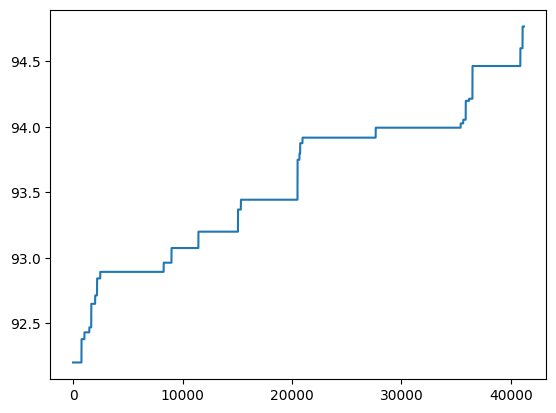

In [17]:
shehui_guanxi['cons.price.idx'].sort_values(ignore_index=True).plot(kind='line')

----
## 数据建模
- 模型分析,特征向量提取,生成模型,模型预测等

In [18]:
tezheng = pd.concat([kehu_guanxi,lianxi_guanxi,other_guanxi,shehui_guanxi],axis=1)
tezheng

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,3,1,0,0,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,3,7,1,3,1,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,2,7,1,3,0,2,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,2,0,1,1,0,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,3,7,1,3,0,0,2,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0,0,7,0,3,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,2,1,1,5,0,0,0,0,7,0,3,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,3,5,1,6,0,2,0,0,7,0,2,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,2,9,1,5,0,0,0,0,7,0,3,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
dtc = DecisionTreeClassifier(max_depth=5)
score = cross_val_score(dtc,tezheng,target,cv=10)
#平均正确率
score.mean()

0.723812752025965

In [29]:
dtcfp = dtc.fit(tezheng,target)

----
## 数据可视化
- 包含`模型预测结果的可视化`,以及其他的`无关模型预测的单纯EDA可视化`

[Text(0.5, 0.9166666666666666, 'x[19] <= 5087.65\ngini = 0.2\nsamples = 41184\nvalue = [36544, 4640]'),
 Text(0.25, 0.75, 'x[10] <= 1.5\ngini = 0.494\nsamples = 4964\nvalue = [2755, 2209]'),
 Text(0.125, 0.5833333333333334, 'x[14] <= 1.5\ngini = 0.147\nsamples = 778\nvalue = [716, 62]'),
 Text(0.0625, 0.4166666666666667, 'x[16] <= 93.166\ngini = 0.098\nsamples = 693\nvalue = [657, 36]'),
 Text(0.03125, 0.25, 'x[11] <= 5.5\ngini = 0.129\nsamples = 476\nvalue = [443, 33]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.124\nsamples = 467\nvalue = [436, 31]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.09375, 0.25, 'x[0] <= 3.5\ngini = 0.027\nsamples = 217\nvalue = [214, 3]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.019\nsamples = 213\nvalue = [211, 2]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1875, 0.4166666666666667, 'x[18] <= 0.852\ngini = 0.425\nsamples = 85\nvalue = [59, 26]'),

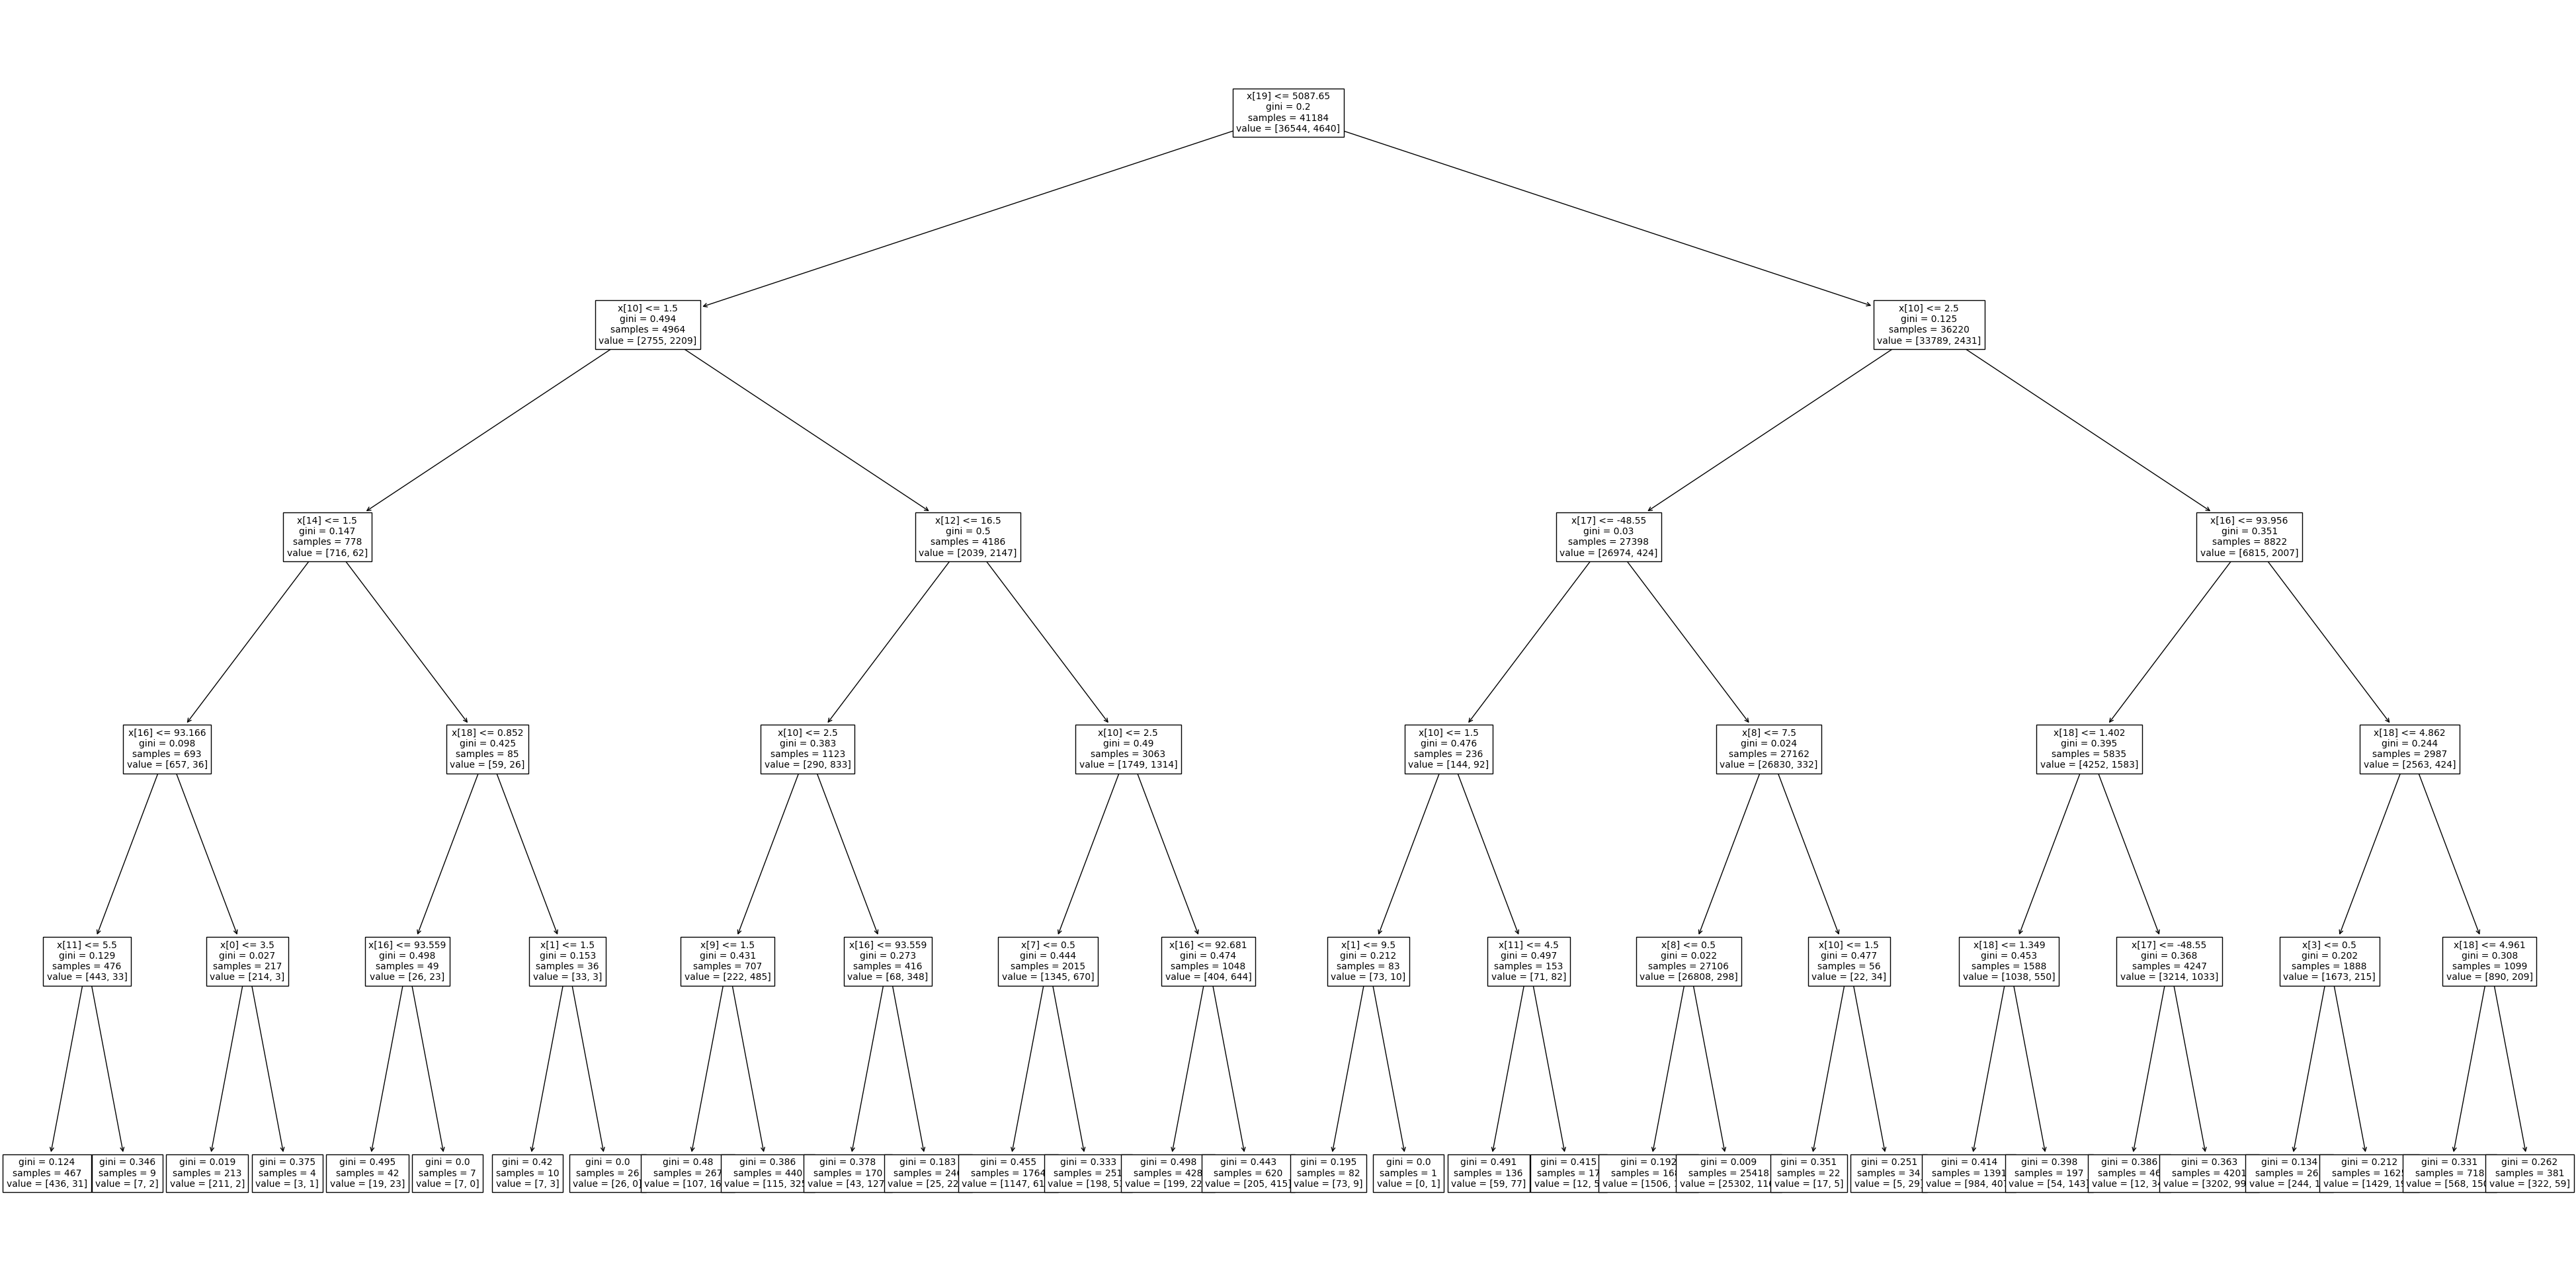

In [38]:
plt.figure(figsize=(50,25))
plot_tree(dtcfp,fontsize=10)

<AxesSubplot: xlabel='age', ylabel='count'>

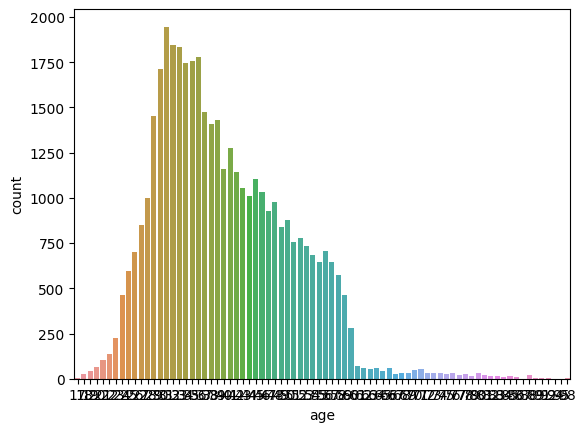

In [20]:
# EDA exploratory data-analysis
sns.countplot(df,x='age')

In [ ]:
#其他图表

> 优秀分析案例参考: https://www.kaggle.com/code/dhirajkumar612/client-subscription

> 不可照搬